Author: *Ana Paula Bernardo*

Linkedin: https://www.linkedin.com/in/ana-paula-sbernardo/

GitHub: https://github.com/anaapbernardo

In [119]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# Links
url_data = 'https://github.com/anaapbernardo/Bootcamp_DataScience/blob/main/Files%20-%20Bootcamp%20Data%20Science/PENSE_AMOSTRA2_ALUNO.CSV?raw=true'
url_dict = 'https://github.com/anaapbernardo/Bootcamp_DataScience/blob/main/Files%20-%20Bootcamp%20Data%20Science/Dicionario_PENSE_Microdados_AMOSTRA2.xls?raw=true'

In [121]:
# Reading the dataset
df = pd.read_csv(url, sep=';', thousands='.', decimal=',')

# Reading the Q&A dictionary
df_dict = pd.read_excel(url_dict)

### Dictionaries

In [122]:
dict_race = {1: 'White',
             2: 'Black',
             3: 'Yellow (Asian descendants)',
             4: 'Brown (Pardo)',
             5: 'Indian',
             99: 'Not informed'
            }

In [123]:
dict_answers = {1: 'None',
                2: '1 day',
                3: '2 days',
                4: '3 days',
                5: '4 days',
                6: '5 days',
                7: '6 days',
                8: 'Everyday',
                99: 'Not informed'
               }

In [124]:
dict_hungry = {1: 'Never',
               2: 'Rarely',
               3: 'Sometimes',
               4: 'Most of the time',
               5: 'Always',
               99: 'Not informed'
              }

### Functions

In [125]:
# Dictionary to interpret the question's code

def get_question_description(colum_name) -> dict:
    
    return_dict = dict()

    description_row = df_dict.query(f'VARIÁVEL == "{colum_name}"')['QUESTIONÁRIO DO ALUNO']
    return_dict['Question'] = description_row.values[0]
   
    values = list()
    index = description_row.index[0] + 1
    value = df_dict.iloc[index]['VARIÁVEL']
    
    # Verifying if caracter is or not equal as some answers has the result -1
    while str(value)[0].isnumeric() or str(value)[0] == '-':
        values.append([value, df_dict.iloc[index]['QUESTIONÁRIO DO ALUNO']])
        index += 1
        value = df_dict.iloc[index]['VARIÁVEL']
    return_dict['Description'] = dict(values)
    
    return return_dict

In [126]:
def get_cross_frequency(question1: str, question2: str, dict1: dict, dict2: dict):
    
    cross_frequency = pd.crosstab(df[question1], df[question2], normalize = 'index') * 100
    cross_frequency.rename(index = dict1, inplace = True)
    cross_frequency.rename(columns = dict2, inplace = True)
    
    return cross_frequency.round(2)

## Preliminary Analysis

In [127]:
df

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16551,2015,76,5,1,2,4,12,8,8,1,...,521,5,447.815539,1,2,4,1,16552,371,117
16552,2015,76,5,1,1,1,15,7,5,1,...,521,5,592.507440,1,2,4,1,16553,371,117
16553,2015,76,5,1,1,4,13,11,7,1,...,521,5,401.131512,1,2,4,1,16554,371,117
16554,2015,76,5,1,1,4,14,8,6,1,...,521,5,442.718091,1,2,4,1,16555,371,117


In [128]:
df.isnull().sum()

ANOPESQ    0
PAIS       0
REGEOGR    0
VB00004    0
VB01001    0
          ..
V0008      0
V0041      0
aluno      0
escola     0
turma      0
Length: 181, dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(10), int64(171)
memory usage: 22.9 MB


In [130]:
df.describe()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
count,16556.0,16556.0,16556.000000,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,...,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,2015.0,76.0,3.012443,1.0,1.499456,2.698417,14.095917,6.529778,6.497886,1.177821,...,3095.650459,3.012443,1144.868891,1.051401,1.252174,2.671781,-0.341024,8278.500000,186.053938,320.036241
std,0.0,0.0,1.414031,0.0,0.500015,3.868506,2.127947,4.210372,4.016313,2.542142,...,1443.400564,1.414031,1133.068244,0.220822,0.434274,0.872426,1.282048,4779.449864,107.358284,186.022453
min,2015.0,76.0,1.000000,1.0,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,...,311.000000,1.000000,24.213647,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000
25%,2015.0,76.0,2.000000,1.0,1.000000,1.000000,12.000000,4.000000,5.000000,1.000000,...,2121.000000,2.000000,404.965321,1.000000,1.000000,2.000000,-1.000000,4139.750000,97.000000,159.000000
50%,2015.0,76.0,3.000000,1.0,1.000000,2.000000,14.000000,6.000000,6.000000,1.000000,...,3123.000000,3.000000,746.438889,1.000000,1.000000,2.000000,-1.000000,8278.500000,184.000000,316.000000
75%,2015.0,76.0,4.000000,1.0,2.000000,4.000000,16.000000,9.000000,8.000000,1.000000,...,4123.000000,4.000000,1510.244112,1.000000,2.000000,4.000000,1.000000,12417.250000,276.000000,475.000000
max,2015.0,76.0,5.000000,1.0,2.000000,99.000000,19.000000,99.000000,99.000000,99.000000,...,5223.000000,5.000000,17888.589630,2.000000,2.000000,4.000000,4.000000,16556.000000,371.000000,653.000000


In [131]:
df.select_dtypes(include='float64')

,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB17001,VB17002,VB17003,VB17004,PESO
0,0.0,15.0,0.0,15.0,60.0,371.0,1570.0,37.1,157.0,299.735235
1,120.0,510.0,260.0,130.0,300.0,502.0,1520.0,50.2,152.0,355.170081
2,0.0,585.0,130.0,455.0,420.0,482.0,1614.0,48.2,161.4,299.735235
3,0.0,0.0,0.0,0.0,0.0,694.0,1725.0,69.4,172.5,355.170081
4,30.0,165.0,90.0,45.0,60.0,789.0,1675.0,78.9,167.5,299.735235
...,...,...,...,...,...,...,...,...,...,...
16551,30.0,400.0,110.0,260.0,240.0,567.0,1679.0,56.7,167.9,447.815539
16552,20.0,800.0,325.0,455.0,240.0,619.0,1858.0,61.9,185.8,592.507440
16553,0.0,0.0,0.0,0.0,60.0,609.0,1594.0,60.9,159.4,401.131512
16554,75.0,215.0,35.0,105.0,120.0,473.0,1578.0,47.3,157.8,442.718091


### **Evaluating the color/race distribuition between the students**

In [132]:
get_question_description('VB01002')

{'Question': 'Qual é a sua cor ou raça?',
 'Description': {'1': 'Branca',
  '2': 'Preta',
  '3': 'Amarela',
  '4': 'Parda',
  '5': 'Indígena',
  99: 'Não informado'}}

In [133]:
frequency = df['VB01002'].value_counts()
frequency

4     6726
1     6575
2     1939
3      712
5      581
99      23
Name: VB01002, dtype: int64

In [134]:
percentage = (df['VB01002'].value_counts(normalize = True) * 100).round(2)
percentage

4     40.63
1     39.71
2     11.71
3      4.30
5      3.51
99     0.14
Name: VB01002, dtype: float64

In [135]:
freq_distribuition = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})
freq_distribuition.rename(index = dict_race, inplace = True)
freq_distribuition.rename_axis('What is your color or race?', axis=1, inplace = True)
freq_distribuition

What is your color or race?,Frequency,Percentage
Brown (Pardo),6726,40.63
White,6575,39.71
Black,1939,11.71
Yellow (Asian descendants),712,4.30
Indian,581,3.51
Not informed,23,0.14


<AxesSubplot:title={'center':'Frequency distribuition'}, xlabel='Color', ylabel='Frequency'>

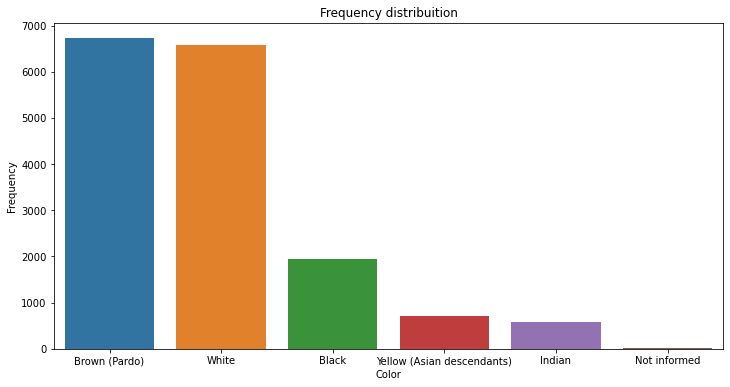

In [136]:
ax = sns.barplot(x = freq_distribuition.index, y = 'Frequency', data = freq_distribuition)
ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribuition')
ax.set_xlabel('Color')
ax

### **Evaluating the eating habits**

#### Healthy eating markers

In [137]:
question_beans = get_question_description('VB02001')
question_beans

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu feijão?',
 'Description': {'1': 'Não comi feijão nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias ',
  '3': '2 dias nos últimos 7 dias ',
  '4': '3 dias nos últimos 7 dias ',
  '5': '4 dias nos últimos 7 dias ',
  '6': '5 dias nos últimos 7 dias ',
  '7': '6 dias nos últimos 7 dias ',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [203]:
# Beans
eating_frequency_beans = get_cross_frequency('VB01002', 'VB02001', dict_race, dict_answers)
eating_frequency_beans

VB02001,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday,Not informed
VB01002,,,,,,,,,
White,12.99,8.85,8.40,8.70,8.47,8.17,7.77,36.49,0.17
Black,10.37,9.54,7.48,8.41,6.70,6.29,6.29,44.61,0.31
Yellow (Asian descendants),11.80,8.43,7.72,8.15,6.32,8.29,8.43,40.87,0.00
Brown (Pardo),10.02,8.19,7.69,8.99,7.24,7.98,6.84,42.80,0.24
Indian,14.63,7.75,4.65,9.47,7.57,6.20,7.23,42.17,0.34
Not informed,13.04,8.70,4.35,0.00,0.00,4.35,8.70,56.52,4.35


In [229]:
melt = eating_frequency_beans.melt(value_name = 'Percentage', ignore_index = False)
melt

,VB02001,Percentage
VB01002,,
White,None,12.99
Black,None,10.37
Yellow (Asian descendants),None,11.80
Brown (Pardo),None,10.02
Indian,None,14.63
Not informed,None,13.04
White,1 day,8.85
Black,1 day,9.54
Yellow (Asian descendants),1 day,8.43


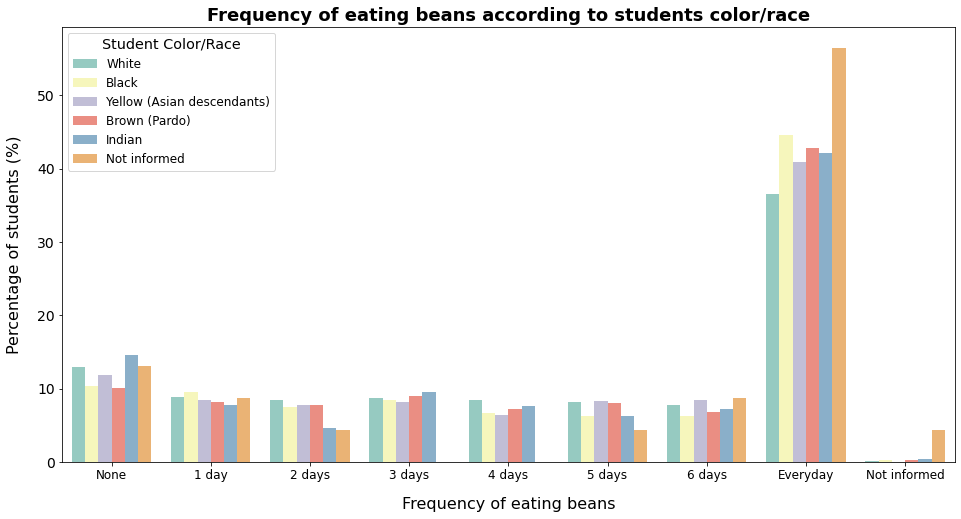

In [325]:
plt.figure(figsize = (16,8))
sns.barplot(x = 'VB02001', y = melt['Percentage'], hue = melt.index, palette = 'Set3', data = melt)

# Setting parameters
plt.title('Frequency of eating beans according to students color/race', fontsize = 18, fontweight = 'bold')
plt.legend(title = 'Student Color/Race', title_fontsize = 'x-large', fontsize = 'large')
plt.xlabel('Frequency of eating beans', fontsize = 16, labelpad = 15)
plt.ylabel('Percentage of students (%)', fontsize = 16, labelpad = 15)
plt.xticks(size = 12)
plt.yticks(size = 14)

plt.show()

In [261]:
question_vegetables = get_question_description('VB02004A')
question_vegetables

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemplos: alface, abóbora, brócolis, cebola, cenoura, chuchu, couve, espinafre, pepino, tomate etc. Não inclua batata e aipim (mandioca/macaxeira).',
 'Description': {'1': 'Não comi nenhum tipo de salada crua, legume ou verdura cozidos nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [140]:
# Vegetables 
eating_frequency_vegetables = get_cross_frequency('VB01002', 'VB02004A', dict_race, dict_answers)
eating_frequency_vegetables

VB02004A,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday,Not informed
VB01002,,,,,,,,,
White,16.61,10.36,10.21,10.52,9.66,7.63,6.68,28.14,0.20
Black,19.86,13.15,11.29,10.62,7.32,6.70,5.72,25.06,0.26
Yellow (Asian descendants),16.71,11.66,10.96,10.96,8.43,5.90,7.30,27.95,0.14
Brown (Pardo),17.45,12.15,11.15,11.49,8.98,7.60,5.62,25.41,0.15
Indian,18.76,12.05,11.36,10.67,7.92,7.23,5.68,25.65,0.69
Not informed,17.39,21.74,0.00,4.35,13.04,4.35,4.35,30.43,4.35


In [141]:
question_fruits = get_question_description('VB02011')
question_fruits

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu frutas frescas ou salada de frutas? ',
 'Description': {'1': 'Não comi frutas frescas ou salada de frutas nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [142]:
# Fuits
eating_frequency_fruits = get_cross_frequency('VB01002', 'VB02011', dict_race, dict_answers)
eating_frequency_fruits

VB02011,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday,Not informed
VB01002,,,,,,,,,
White,18.57,12.62,12.53,11.94,9.60,8.02,5.75,20.79,0.18
Black,19.75,13.15,12.22,11.86,7.79,7.79,5.52,21.51,0.41
Yellow (Asian descendants),20.08,13.90,11.10,11.80,8.99,7.72,5.34,20.93,0.14
Brown (Pardo),20.03,12.91,13.31,12.30,8.82,7.43,5.37,19.67,0.18
Indian,19.79,9.98,14.63,8.43,8.78,8.09,8.26,21.34,0.69
Not informed,21.74,21.74,8.70,21.74,4.35,4.35,4.35,13.04,0.00


#### Not healthy eating markers

In [143]:
question_fried_food = get_question_description('VB02002')
question_fried_food

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu salgados fritos? Exemplo: batata frita (sem contar a batata de pacote) ou salgados fritos como coxinha de galinha, quibe frito, pastel frito, acarajé etc.',
 'Description': {'1': 'Não comi salgados fritos nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [144]:
# Fried food
eating_frequency_fried_food = get_cross_frequency('VB01002', 'VB02002', dict_race, dict_answers)
eating_frequency_fried_food

VB02002,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday,Not informed
VB01002,,,,,,,,,
White,30.90,22.05,16.68,11.88,6.04,4.06,2.02,6.16,0.20
Black,32.96,20.37,13.56,11.24,5.93,3.97,2.37,9.18,0.41
Yellow (Asian descendants),32.87,19.80,15.87,10.96,6.74,3.37,2.11,8.15,0.14
Brown (Pardo),33.85,21.02,15.82,10.12,5.96,4.30,2.13,6.65,0.15
Indian,33.39,22.38,14.63,8.26,5.51,4.82,2.93,7.57,0.52
Not informed,30.43,17.39,13.04,8.70,4.35,0.00,4.35,13.04,8.70


In [145]:
question_candies = get_question_description('VB02010')
question_candies

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu guloseimas (doces, balas, chocolates, chicletes, bombons ou pirulitos)?',
 'Description': {'1': 'Não comi guloseimas nos últimos 7 dias (0 dia)',
  '2': '1dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [146]:
# Candies
eating_frequency_candies = get_cross_frequency('VB01002', 'VB02010', dict_race, dict_answers)
eating_frequency_candies

VB02010,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday,Not informed
VB01002,,,,,,,,,
White,10.87,14.45,14.21,13.90,10.36,8.09,5.90,21.98,0.24
Black,13.25,14.23,13.82,10.78,8.35,7.17,5.98,26.10,0.31
Yellow (Asian descendants),12.36,14.04,11.24,12.36,9.13,8.57,6.32,25.84,0.14
Brown (Pardo),12.36,14.41,14.21,12.53,9.81,7.89,5.92,22.70,0.16
Indian,14.29,14.29,12.05,13.08,8.26,9.29,5.34,22.72,0.69
Not informed,4.35,17.39,4.35,13.04,8.70,8.70,4.35,34.78,4.35


In [147]:
question_soda = get_question_description('VB02013')
question_soda

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você tomou refrigerante?',
 'Description': {'1': 'Não tomei refrigerante nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [148]:
# Soda
eating_frequency_soda = get_cross_frequency('VB01002', 'VB02013', dict_race, dict_answers)
eating_frequency_soda

VB02013,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday,Not informed
VB01002,,,,,,,,,
White,19.82,16.93,16.32,12.00,8.53,6.97,4.90,14.42,0.12
Black,18.21,17.02,15.16,12.84,8.41,6.81,5.21,15.88,0.46
Yellow (Asian descendants),18.96,18.12,15.59,11.10,10.11,7.72,4.21,14.19,0.00
Brown (Pardo),19.22,17.32,16.90,13.59,8.67,6.54,4.56,13.05,0.13
Indian,18.93,19.62,17.38,12.22,7.92,5.51,2.93,14.97,0.52
Not informed,21.74,8.70,13.04,17.39,13.04,4.35,8.70,13.04,0.00


In [149]:
question_industrialized_food = get_question_description('VB02022')
question_industrialized_food

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados salgados, como hambúrguer, presunto, mortadela, salame, linguiça, salsicha, macarrão instantâneo, salgadinho de pacote, biscoitos salgados?',
 'Description': {'1': 'Não comi alimentos industrializados/ultraprocessados salgados nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [150]:
# Industrialized food (ham, sausage, chips, etc.)
eating_frequency_indust_food = get_cross_frequency('VB01002', 'VB02022', dict_race, dict_answers)
eating_frequency_indust_food

VB02022,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday,Not informed
VB01002,,,,,,,,,
White,14.40,14.19,15.12,13.79,10.94,8.50,6.02,16.84,0.20
Black,19.19,16.40,13.25,13.10,9.54,6.50,4.85,16.61,0.57
Yellow (Asian descendants),16.71,14.61,13.20,12.92,10.11,8.15,5.34,18.82,0.14
Brown (Pardo),17.28,16.32,14.32,13.11,9.41,8.36,5.38,15.55,0.27
Indian,19.10,14.46,12.56,15.15,7.92,6.37,7.06,16.87,0.52
Not informed,17.39,4.35,21.74,8.70,13.04,4.35,0.00,13.04,17.39


In [151]:
question_fast_food = get_question_description('VB02023')
question_fast_food

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu em restaurantes fast food, tais como lanchonetes, barracas de cachorro quentes, pizzaria etc?',
 'Description': {'1': 'Não comi em restaurantes fast food nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [152]:
# Fast food
eating_frequency_fast_food = get_cross_frequency('VB01002', 'VB02023', dict_race, dict_answers)
eating_frequency_fast_food

VB02023,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday,Not informed
VB01002,,,,,,,,,
White,50.24,21.84,11.24,6.74,3.57,2.37,1.38,2.48,0.14
Black,55.29,18.51,10.88,5.72,3.09,1.65,1.65,2.78,0.41
Yellow (Asian descendants),50.98,21.07,12.08,6.60,2.81,2.53,0.84,2.81,0.28
Brown (Pardo),54.40,19.86,11.08,5.78,3.15,1.96,1.38,2.16,0.22
Indian,52.50,21.34,10.84,6.20,3.27,1.72,2.24,1.55,0.34
Not informed,56.52,13.04,17.39,0.00,4.35,4.35,0.00,0.00,4.35


#### Hungry

In [153]:
question_hungry = get_question_description('VB02024')
question_hungry

{'Question': 'NOS ÚLTIMOS 30 DIAS, com que frequência você ficou com fome por não ter comida suficiente em sua casa?',
 'Description': {'1': 'Nunca',
  '2': 'Raramente',
  '3': 'Às vezes',
  '4': 'Na maior parte das vezes',
  '5': 'Sempre',
  99: 'Não informado'}}

In [154]:
# Hungry
frequency_hungry = get_cross_frequency('VB01002', 'VB02024', dict_race, dict_hungry)
frequency_hungry

VB02024,Never,Rarely,Sometimes,Most of the time,Always,Not informed
VB01002,,,,,,
White,78.31,10.80,8.15,1.38,1.20,0.15
Black,74.16,11.35,10.31,1.60,2.22,0.36
Yellow (Asian descendants),77.53,10.81,8.29,1.69,1.40,0.28
Brown (Pardo),77.82,10.57,8.77,1.56,1.17,0.10
Indian,75.04,11.36,9.64,2.24,1.38,0.34
Not informed,69.57,8.70,8.70,4.35,0.00,8.70
